# Synthetic data generation using CTGAN
### Required Installation 
    py -3.9 -m pip install ctgan
    py -3.9 -m pip show ctgan
    CTGAN: https://github.com/sdv-dev/CTGAN

In [10]:
import os
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from CTGan.ctgan import CTGAN
from Core.tSNE import tSNEPlots

print(os.getcwd())

c:\Sandeep Gupta\01. Workspaces\fbEvasionMetrics\AdvFailureCurves


# Load Data

## <font color='red'> KYOTO </font>

In [11]:
strFileName =  r'../DATA/Kyoto2015DS.csv'
dfKyoto = pd.read_csv(strFileName, delimiter=',')

print(dfKyoto.shape)
print(dfKyoto.groupby('label').size())
#print(dfKyoto.head(5))

(60000, 14)
label
0    30000
1    30000
dtype: int64


### Select Negative Data

In [12]:
# Select rows where column 'column_name' equals a specific value
dfRealData = dfKyoto.loc[dfKyoto['label'] == 1]
dfRealData = dfRealData.drop('label', axis=1)
print(dfRealData.shape)

(30000, 13)


## <font color='red'>BETH60k</font>

In [ ]:
cDATA = 'Beth60K_Adv'

strFileName =  r'../DATA/Beth60K_23Oct2025.csv'
dfBETH60K = pd.read_csv(strFileName, delimiter=',')

print(dfBETH60K.shape)
print(dfBETH60K.groupby('label').size())

### Select Negative Data

In [ ]:
# Select rows where column 'column_name' equals a specific value
dfRealData = dfBETH60K.loc[dfBETH60K['sus'] == 1]
dfRealData = dfRealData.drop('sus', axis=1)
print(dfRealData.shape)

## Boxplot

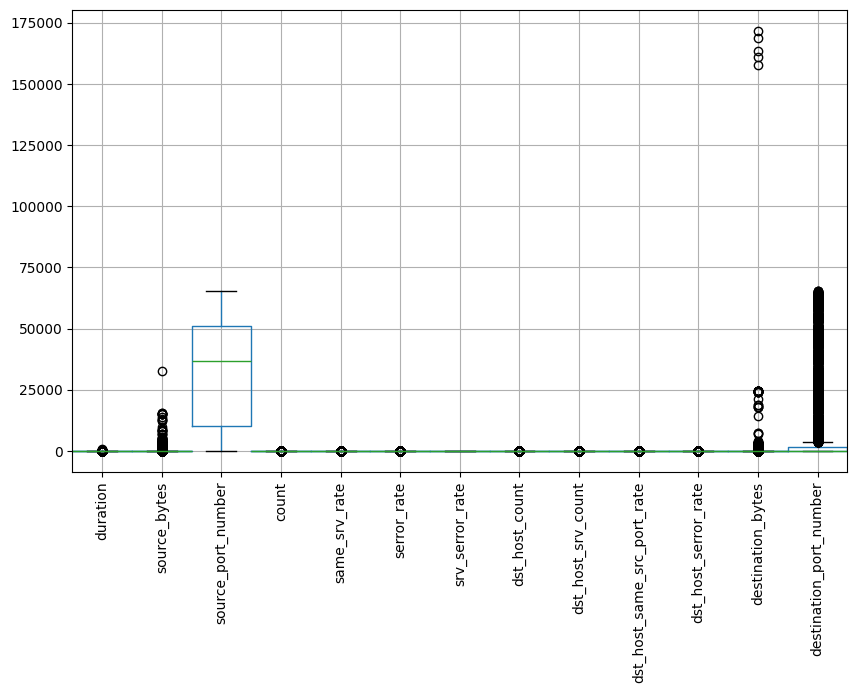

In [5]:
dfRealData.boxplot(figsize = (10, 6), widths = 1)
# Rotate x-axis labels
plt.xticks(rotation=90)
#plt.xlabel("X-axis Label", fontsize=14, fontweight='bold', fontfamily='Arial')
plt.show()

---
# <font color='blue'>Generate Synthetic Data</font>

## Configure CTGAN

In [13]:
ctgan = CTGAN(epochs=10)
ctgan.fit(dfRealData)

In [14]:
print(CTGAN)

<class 'CTGan.ctgan.CTGAN'>


## Create synthetic data

In [ ]:
nSample = 3000
dfSynData = ctgan.sample(nSample)
print(dfSynData.shape)
print(dfSynData.head(5))

strSynFileName = '../DATA/Kyoto_Syn_' + str(nSample) + '.csv'
dfSynData.to_csv(strSynFileName, index=False)

(3000, 13)
    duration  source_bytes  source_port_number  count  same_srv_rate  \
0   2.608663             0               54895      3      -0.002188   
1   0.962561             2               61561      0      -0.000033   
2   0.055465             5               49903      0       0.000965   
3   3.429794            58               26239      0      -0.001881   
4  13.828350            64               54872      0      -0.000573   

   serror_rate  srv_serror_rate  dst_host_count  dst_host_srv_count  \
0     0.001016         0.879266               0                  28   
1     0.001312        -0.002282               0                  -1   
2     0.001116         0.007337               4                   0   
3     0.001391        -0.002925               0                   0   
4     0.002501         0.516565               0                   9   

   dst_host_same_src_port_rate  dst_host_serror_rate  destination_bytes  \
0                    -0.001413             -0.000541  

---
# <font color='green'>tSNE Plot</font>

In [4]:
dfReal_100 = dfRealData.sample(n=100, random_state=42)
dfReal_100['Label'] = 0
print(dfReal_100.shape)

strSynFileName = '../DATA/Kyoto_Syn_100.csv'
dfSyn_100 = pd.read_csv(strSynFileName, delimiter=',')
dfSyn_100['Label'] = 1
print(dfSyn_100.shape)

listDS = np.vstack([dfReal_100.to_numpy(), dfSyn_100.to_numpy()])
print(listDS.shape)

(100, 14)
(100, 14)
(200, 14)


Data for tSNE (200, 13)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...


c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:

[t-SNE] Computed neighbors for 200 samples in 0.273s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 5203.701867
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.249130
[t-SNE] KL divergence after 300 iterations: 0.154641


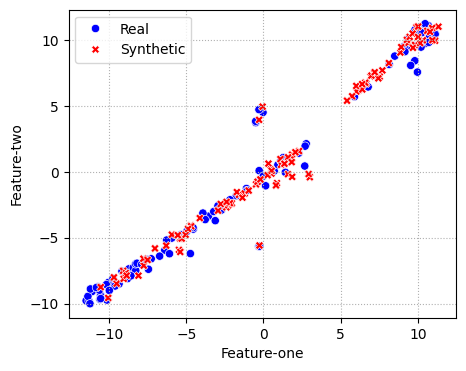

In [5]:
dfCols = ['Bin_'+str(i) for i in range(dfRealData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Real', 'Synthetic'], 
          strOutputFile=None, strLoc='best')